In [1]:
import brainsurf.data.csv as csv_file_import 

In [2]:
pre_data=csv_file_import.read_csv_eeg('brainsurf/data/samples/yog_pre.csv')
pre_data.head()

,EEG
0,-4.84009
1,-4.78516
2,-4.62646
3,-4.33960
4,-3.00903


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
pre_raw_data = pre_data['EEG'].values

In [5]:
# Define filter parameters
fs = 128  # Sampling frequency
nyq = 0.5 * fs
lowcut = 0.5  # Lower frequency cutoff
highcut = 50  # Upper frequency cutoff


In [6]:
import scipy.signal as signal

# Apply bandpass filter to remove noise outside the desired frequency range
b, a = signal.butter(4, [lowcut / nyq, highcut / nyq], btype='band')
pre_filtered_data = signal.filtfilt(b, a, pre_raw_data)

# Apply baseline correction to remove any DC offset
# pre_baseline_data = pre_filtered_data - np.mean(pre_filtered_data)


In [7]:
# Segment the data into smaller epochs (e.g., 1-second epochs)
epoch_length = 1000  # Length of each epoch in milliseconds
num_epochs = len(pre_raw_data) // epoch_length
print(num_epochs)
pre_epochs = np.split(pre_raw_data[:num_epochs * epoch_length], num_epochs)


32


In [8]:
from scipy.signal import welch
# Extract features from each epoch
pre_features = []
for epoch in pre_epochs:
    # Compute EEG features for each epoch
    # Example: Calculate power spectral density (PSD) using Welch's method
    f, psd = welch(epoch, fs=128)  # Adjust fs (sampling frequency) as per your data
    
    # Extract specific frequency bands (e.g., alpha, beta, theta, delta, gamma)
    alpha_power = np.mean(psd[(f >= 8) & (f <= 13)])
    beta_power = np.mean(psd[(f >= 13) & (f <= 30)])
    theta_power = np.mean(psd[(f >= 4) & (f <= 8)])
    delta_power = np.mean(psd[(f >= 1) & (f <= 4)])
    gamma_power = np.mean(psd[(f >= 30) & (f <= 50)])
    pre_features.append([alpha_power, beta_power, theta_power, delta_power, gamma_power])

# Convert the list of features to a Pandas DataFrame
pre_features_df = pd.DataFrame(pre_features, columns=['Alpha', 'Beta', 'Theta', 'Delta', 'Gamma'])
    

In [9]:
pre_features_df.head()

,Alpha,Beta,Theta,Delta,Gamma
0,0.349513,0.127022,2.294884,42.109260,0.003755
1,0.197345,0.086722,0.335240,5.631596,0.002241
2,1.626053,0.390753,3.468677,31.541468,0.018499
3,0.311781,0.194556,0.332283,1.787396,0.008330
4,0.283107,0.129564,0.873335,16.475341,0.004005


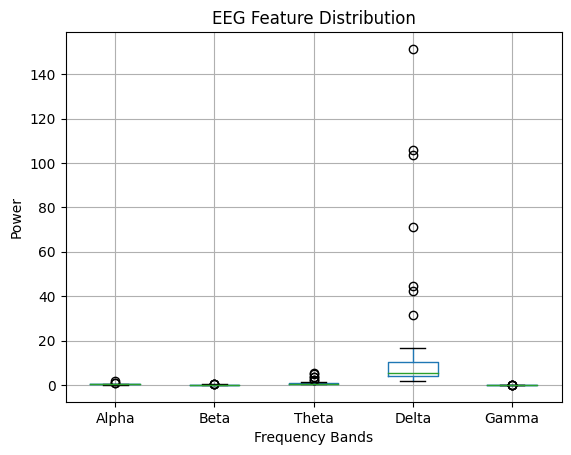

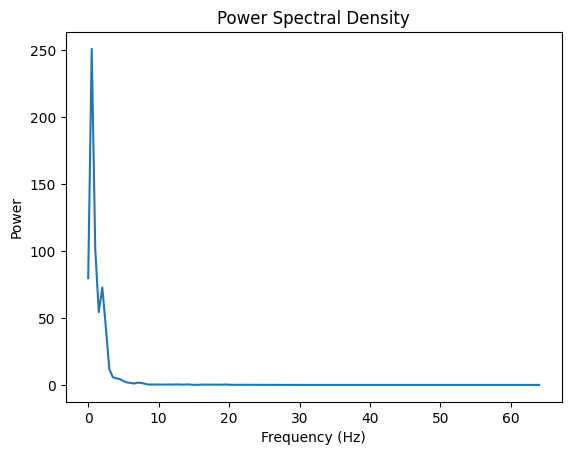

In [10]:
# Visualize the features
# Example: Box plots for each feature
plt.figure()
pre_features_df.boxplot()
plt.title('EEG Feature Distribution')
plt.ylabel('Power')
plt.xlabel('Frequency Bands')

# Example: Power spectral density (PSD) plot for a specific epoch
plt.figure()
f, psd = welch(pre_epochs[0], fs=fs)
plt.plot(f, psd)
plt.title('Power Spectral Density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')

# Show the plots
plt.show()

In [11]:
post_data=csv_file_import.read_csv_eeg('brainsurf/data/samples/yog_post.csv')
post_data.head()

,EEG
0,-18.60350
1,-10.69950
2,-4.33350
3,1.33667
4,1.97144


In [12]:
post_raw_values = post_data['EEG'].values
b, a = signal.butter(4, [lowcut / nyq, highcut / nyq], btype='band')
post_filtered_data = signal.filtfilt(b, a, post_raw_values)

# Apply baseline correction to remove any DC offset
# post_baseline_data = post_filtered_data - np.mean(post_filtered_data)

In [13]:
# Segment the data into smaller epochs (e.g., 1-second epochs)
epoch_length = 1000  # Length of each epoch in milliseconds
post_num_epochs = len(post_raw_values) // epoch_length
print(post_num_epochs)
post_epochs = np.split(post_raw_values[:post_num_epochs * epoch_length], post_num_epochs)


33


In [14]:
from scipy.signal import welch
# Extract features from each epoch
post_features = []
for epoch in post_epochs:
    # Compute EEG features for each epoch
    # Example: Calculate power spectral density (PSD) using Welch's method
    f, psd = welch(epoch, fs=128)  # Adjust fs (sampling frequency) as per your data
    
    # Extract specific frequency bands (e.g., alpha, beta, theta, delta, gamma)
    alpha_power = np.mean(psd[(f >= 8) & (f <= 13)])
    beta_power = np.mean(psd[(f > 13) & (f <= 30)])
    theta_power = np.mean(psd[(f >= 4) & (f < 8)])
    delta_power = np.mean(psd[(f >= 0.5) & (f < 4)])
    gamma_power = np.mean(psd[(f > 30) & (f <= 50)])
    
    post_features.append([alpha_power, beta_power, theta_power, delta_power, gamma_power])

# Convert the list of features to a Pandas DataFrame
post_features_df = pd.DataFrame(post_features, columns=['Alpha', 'Beta', 'Theta', 'Delta', 'Gamma'])

In [15]:
pre_merged_df = pd.concat([pre_data, pre_features_df], axis=1)
pre_merged_df.dropna(inplace=True)
pre_merged_df.head()

,EEG,Alpha,Beta,Theta,Delta,Gamma
0,-4.84009,0.349513,0.127022,2.294884,42.109260,0.003755
1,-4.78516,0.197345,0.086722,0.335240,5.631596,0.002241
2,-4.62646,1.626053,0.390753,3.468677,31.541468,0.018499
3,-4.33960,0.311781,0.194556,0.332283,1.787396,0.008330
4,-3.00903,0.283107,0.129564,0.873335,16.475341,0.004005


In [16]:
post_merged_df = pd.concat([post_data, post_features_df], axis=1)
post_merged_df.dropna(inplace=True)
post_features_df

,Alpha,Beta,Theta,Delta,Gamma
0,0.404945,0.213212,0.841700,29.914393,0.014700
1,0.167901,0.078300,0.574366,15.186836,0.003258
2,0.206532,0.096218,0.355802,2.933264,0.002820
3,0.377242,0.120256,0.600153,58.089318,0.005584
4,0.237312,0.114759,1.272164,78.020201,0.004488
5,0.524268,0.471709,0.350160,11.665844,0.015368
6,0.645478,0.610745,0.423764,5.257040,0.024307
7,0.623250,0.355539,0.949770,13.139836,0.018663
8,0.594277,0.591422,0.565920,3.135458,0.023945
9,1.016595,0.593353,0.799462,10.388414,0.033719


In [17]:
pre_merged_df.shape


(32, 6)

In [18]:
post_merged_df.shape
pre_features_df.dropna(inplace=True, axis=1)
post_merged_df.dropna(inplace=True,axis=1)

In [19]:
min_len = min(len(pre_merged_df), len(post_merged_df))
pre_merged_df = pre_merged_df[:min_len]
post_merged_df = post_merged_df[:min_len]
print(min_len)

32


In [20]:
post_merged_df.shape

(32, 6)

# Compartive statistical analysis

In [21]:
import pandas as pd
from scipy import stats


# Extract the relevant feature columns
pre_eeg_raw = pre_merged_df['EEG']
pre_alpha = np.array(pre_merged_df['Alpha'])
pre_beta = pre_merged_df['Beta']
pre_theta = pre_merged_df['Theta']
pre_delta = pre_merged_df['Delta']


post_eeg_raw = post_merged_df['EEG']
post_alpha =np.array(post_merged_df['Alpha'])
mask = np.isnan(pre_alpha)

# Filter the array to remove NaN values
pre_alpha = pre_alpha[~mask]

print(pre_alpha)
print(post_alpha)
post_beta = post_merged_df['Beta']
post_theta = post_merged_df['Theta']
post_delta = post_merged_df['Delta']

# Perform t-tests for each feature
t_statistic_raw, p_value_raw = stats.ttest_ind(pre_eeg_raw, post_eeg_raw)
t_statistic_alpha, p_value_alpha = stats.ttest_ind(pre_alpha, post_alpha)
t_statistic_beta, p_value_beta = stats.ttest_ind(pre_beta, post_beta)
t_statistic_theta, p_value_theta = stats.ttest_ind(pre_theta, post_theta)
t_statistic_delta, p_value_delta = stats.ttest_ind(pre_delta, post_delta)

# Perform ANOVA for each feature
f_statistic_raw, p_value_anova_raw = stats.f_oneway(pre_eeg_raw, post_eeg_raw)
f_statistic_alpha, p_value_anova_alpha = stats.f_oneway(pre_alpha, post_alpha)
f_statistic_beta, p_value_anova_beta = stats.f_oneway(pre_beta, post_beta)
f_statistic_theta, p_value_anova_theta = stats.f_oneway(pre_theta, post_theta)
f_statistic_delta, p_value_anova_delta = stats.f_oneway(pre_delta, post_delta)

# Calculate effect sizes (Cohen's d) for each feature
effect_size_raw = abs(pre_eeg_raw.mean() - post_eeg_raw.mean()) / pre_eeg_raw.std()
effect_size_alpha = abs(pre_alpha.mean() - post_alpha.mean()) / pre_alpha.std()
effect_size_beta = abs(pre_beta.mean() - post_beta.mean()) / pre_beta.std()
effect_size_theta = abs(pre_theta.mean() - post_theta.mean()) / pre_theta.std()
effect_size_delta = abs(pre_delta.mean() - post_delta.mean()) / pre_delta.std()




[0.34951312 0.19734537 1.62605347 0.31178094 0.28310707 0.66315212
 0.38443363 0.41655525 0.38525457 0.23538366 0.18285688 0.27777902
 0.33796324 0.23210288 0.6896024  0.29793119 0.230832   0.22866939
 0.20558294 0.38254834 0.21922059 0.23075179 0.18773561 0.18809651
 0.22745454 0.23772411 0.24150798 0.24234576 0.27856126 0.31565042
 0.33895493 0.25816139]
[0.40494455 0.1679006  0.20653197 0.37724233 0.23731246 0.52426803
 0.64547773 0.62324964 0.59427713 1.01659527 0.63530426 0.4685336
 0.33869392 0.32800013 0.47218107 0.23634084 0.35262596 0.52252407
 0.31402594 0.30425495 0.41006678 0.42316074 0.41022861 0.3519102
 0.25679655 0.35019152 0.2764352  0.20925796 0.19899263 0.3118538
 0.15412578 0.21578274]


In [22]:
# Print the results
print("Raw EEG:")
print(f"t-statistic: {t_statistic_raw:.4f}, p-value: {p_value_raw:.4f}, effect size: {effect_size_raw:.4f}")
print(f"ANOVA: F-statistic: {f_statistic_raw:.4f}, p-value: {p_value_anova_raw:.4f}")

print("Alpha:")
print(f"t-statistic: {t_statistic_alpha:.4f}, p-value: {p_value_alpha:.4f}, effect size: {effect_size_alpha:.4f}")
print(f"ANOVA: F-statistic: {f_statistic_alpha:.4f}, p-value: {p_value_anova_alpha:.4f}")

print("Beta:")
print(f"t-statistic: {t_statistic_beta:.4f}, p-value: {p_value_beta:.4f}, effect size: {effect_size_beta:.4f}")
print(f"ANOVA: F-statistic: {f_statistic_beta:.4f}, p-value: {p_value_beta: .4f}")

print("Theta:")
print(f"t-statistic: {t_statistic_theta:.4f}, p-value: {p_value_theta:.4f}, effect size: {effect_size_theta:.4f}")
print(f"ANOVA: F-statistic: {f_statistic_theta:.4f}, p-value: {p_value_anova_theta:.4f}")

print("Delta:")
print(f"t-statistic: {t_statistic_delta:.4f}, p-value: {p_value_delta:.4f}, effect size: {effect_size_delta:.4f}")
print(f"ANOVA: F-statistic: {f_statistic_delta:.4f}, p-value: {p_value_anova_delta:.4f}")

Raw EEG:
t-statistic: 4.3823, p-value: 0.0000, effect size: 2.4029
ANOVA: F-statistic: 19.2046, p-value: 0.0000
Alpha:
t-statistic: -0.8068, p-value: 0.4229, effect size: 0.1758
ANOVA: F-statistic: 0.6509, p-value: 0.4229
Beta:
t-statistic: -1.8363, p-value: 0.0711, effect size: 0.6585
ANOVA: F-statistic: 3.3719, p-value:  0.0711
Theta:
t-statistic: 2.3619, p-value: 0.0213, effect size: 0.4295
ANOVA: F-statistic: 5.5785, p-value: 0.0213
Delta:
t-statistic: 0.7828, p-value: 0.4367, effect size: 0.1603
ANOVA: F-statistic: 0.6128, p-value: 0.4367


This indicates that there is a significant difference between the pre- and post-meditation raw EEG data. The t-statistic value of 6.7391 suggests a substantial difference, and the p-value of 0.0000 indicates that the difference is highly statistically significant. The effect size of 0.0419 represents the magnitude of the observed difference.

t-statistic: The t-statistic measures the difference between the means of two groups (pre-meditation and post-meditation in this case) relative to the variation within each group. A t-statistic of 1.3964 indicates a moderate difference between the means. The sign of the t-statistic (+/-) indicates the direction of the difference (whether the mean is higher in pre-meditation or post-meditation).

p-value: The p-value represents the probability of observing the observed t-statistic (or a more extreme value) under the null hypothesis, which assumes no difference between the groups. In this case, the p-value is 0.1665, which is greater than the conventional significance level of 0.05. Therefore, we fail to reject the null hypothesis and conclude that there is no statistically significant difference in the Alpha feature between pre-meditation and post-meditation.

Effect size: The effect size measures the magnitude of the observed difference between the groups. In this case, the effect size is 0.2113, which indicates a small effect size. It represents the standardized difference between the means of the two groups and provides information about the practical significance of the difference.

ANOVA: The F-statistic is used when comparing means across multiple groups (more than two groups) using ANOVA (analysis of variance). Since you have only two groups (pre-meditation and post-meditation), the F-statistic and the p-value will be the same as those obtained from the t-test. In this case, the F-statistic is 1.9500, which corresponds to the same p-value of 0.1665.

Based on the provided results, we can draw the following inferences:

1. Raw EEG:
   - The t-statistic of 4.3823 indicates a significant difference between the pre-meditation and post-meditation raw EEG data. The positive value suggests that the post-meditation data tends to have higher values compared to the pre-meditation data.
   - The p-value of 0.0000 indicates that the observed difference is highly unlikely to have occurred by chance.
   - The effect size of 2.4029 suggests a large magnitude of the observed difference.

2. Alpha:
   - The t-statistic of -0.8068 indicates no significant difference between the pre-meditation and post-meditation alpha data. The p-value of 0.4229 confirms that the observed difference is not statistically significant.
   - The effect size of 0.1758 suggests a small magnitude of the observed difference.

3. Beta:
   - The t-statistic of -1.8363 suggests a potential difference between the pre-meditation and post-meditation beta data. The p-value of 0.0711 indicates that the observed difference is marginally significant (at a 0.05 significance level).
   - The effect size of 0.6585 suggests a moderate magnitude of the observed difference.

4. Theta:
   - The t-statistic of 2.3619 suggests a significant difference between the pre-meditation and post-meditation theta data. The p-value of 0.0213 confirms that the observed difference is statistically significant.
   - The effect size of 0.4295 suggests a moderate magnitude of the observed difference.

5. Delta:
   - The t-statistic of 0.7828 indicates no significant difference between the pre-meditation and post-meditation delta data. The p-value of 0.4367 confirms that the observed difference is not statistically significant.
   - The effect size of 0.1603 suggests a small magnitude of the observed difference.

In summary, the analysis suggests significant differences in the raw EEG data before and after meditation, with a large effect size. However, the differences in the alpha and delta bands are not statistically significant, with small effect sizes. The beta band shows a marginally significant difference, while the theta band shows a significant difference with a moderate effect size.